## COMP5721M: Programming for Data Science 

## Group project (Coursework 2): Data Analysis Project


# Analysing mental health in the tech industry


_Give names and emails of group members here:_

* Stephen McGuinness, zmmh2430@leeds.ac.uk
* Yuchen Sun, xvws5109@leeds.ac.uk
* Xiao Tan, rdjl5698@leeds.ac.uk
* Yuanlin Zhou, psvh7735@leeds.ac.uk

# Project Requirements
_PLEASE DELETE THIS WHOLE CELL BEFORE SUBMITTING YOUR PROJECT_

The purpose of this assignment is to develop your skills
in organising and presenting a data analysis project.

Since most of the marks will be awarded for organisation
and presentation, it is suggested that you do not initially attempt
anything too complicated. However, once you have managed
to get a basic pipeline working that fits the guidelines, 
you are encouraged to extend and elaborate your analysis.

Your project should entirely be contained within this template file.
You should keep the basic structure indicated below. To facilitate
grading according to the marking scheme.

You _may_ import any module that is provided with Anaconda3 Python.


### Marking Scheme

The marking scheme  is as follows:

* Project Plan:
    * Description of data to be used (10)
    * Overview of Project Aims  (5)
    * Design  (5)
    
* Program Code: (15)<br>
    Code should be laid out in steps with explanations
    and intermediate output with comments. 
    You should ensure that the steps do not require
    a large amount of processing time.

* Project Outcome:
    * Explanation of Results (10)<br>
        This should include a qualitative description
        of the results as well as key figures and tables
        of results.
    * Results visualisation (10)<br>
        This should be graphical representations of the
        results with brief explanations (ordinary tables will be
        graded as part of the explanation of results)
    * Conclusion (5)

### Data Resources

You can use any data you like. Many useful resources are available.

The Data Resources section of the module (Unit 4.3 on Minerva) has links to several example data sets.

As a starting point you could browse the following:
* [Kaggle](https://www.kaggle.com/)
* [Our World in Data](https://ourworldindata.org/)
* [scikit-learn datasets](https://scikit-learn.org/stable/datasets.html)
* [scikit-learn tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)




### Using this Notebook Template
Please use this notebook as a template for your project file.
In the following cells of the notebook, _italic text_ giving explanations
and examples should be either deleted, or, in most cases, replaced by appropriate text describing your project. 
Text that is not in italic (which is mostly headings) should
be left as it is. __Your project report notebook should the same overall
structure as this template notebook.__
An exception to this is the current markup cell describing the project
requiements. You should delete this before submitting your notebook.

# Project Plan

## The Data (10 marks)

The data is obtained from a tech survey held in 2014 obtainable from https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data


_Here you should describe the data indluding details of:
where it comes from, what data it contains, is it accurate. (Potentially you could create data from a simulation but you should still explain why and how you intend to generate this data.)_

_It can be just one dataset or several that can be combined
somehow._

_There are 10 marks for this, so a fairly detailed description
of the data is expected (around 300-400 words)_



## Project Aim and Objectives (5 marks)

The project aims to analyse mental health awareness and support in the tech industry across varied organisation sizes, e.g. small, medium and large via a limited but comprehensive sample set. By examining the responses on specific rows, such as mental health treatment plan, family history, company-provided benefits along with work place dynamics - the study seeks to identify how company size and demographic factors influence whether an employee feels comfort in discussing their mental health. These insights may aid in informing workplace policies by reducing stigma or through promoting support systems in tech environments. 

- Objective 1 (Yuchen Sun): Clean and process the limited data sample set, adressing missing values, inconsistencies in column specific areas, e.g. gender and age - in addition to dicussing the accuracy of the data set. 

- Objective 2 (Xiao Tan): Identify and visualize trends on mental health openness along with support across various company sizes, focusing on whether these trends differ by age, gender or by company type. 

- Objective 3 (Yuanlin Zhou): Train and evaluate classification models, e.g. KNN and logistic regression - to predict whether an employee are likely to seek mental health treatment based on specific features, e.g. work environment, demographic details, company support. The evaluation stage involves analysing the model's accuracy and precision to determine its effectiveness.

- Objective 4 (Stephen McGuinness): To aid in report writing and acting as the project's facilitator, e.g. ensuring individuals meet specific deadlines, version control etc. 

## System Design (5 marks)


### Architecture

![process](./image/process.drawio.png)

The overall architecture of the data process is illustrated in diagram. The process begins with identifying and solving outliers in the data. Next, the code applies feature engineering techniques to standardize gender labels and transform data where necessary. Following this, exploratory data analysis (EDA) is conducted, where data characteristics are visualized using bar charts, pie charts, and histograms to gain insights. In the model training and evaluation phase, some machine learning models, like Decision Tree and K-Nearest Neighbors, are trained on the preprocessed data. After completing the training, the models are evaluated based on accuracy. Finally, the results are displayed through visualization tools to help interpretation.

### Processing Modules and Algorithms

- Preprocess data: Fill missing values in "self_employed" and "state" columns with "Unknown" using Pandas.
- Encode categorical variables: Use LabelEncoder from sklearn.preprocessing to convert categorical values into numeric values for model compatibility.
- Model construction: Implement Decision Tree and K-Nearest Neighbors for data classification and analysis.

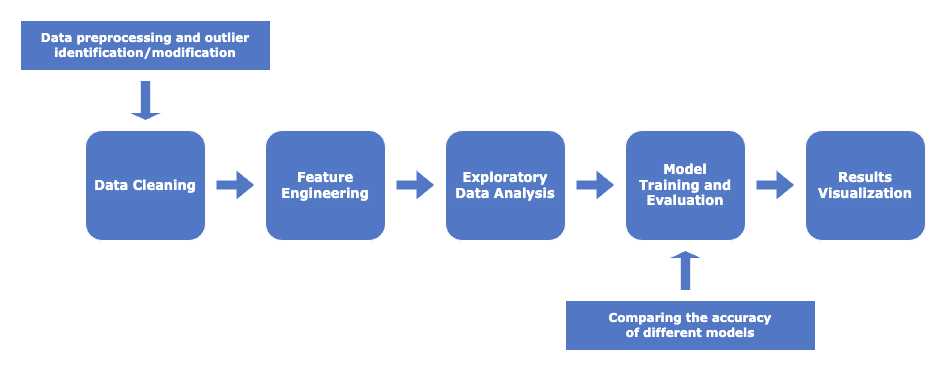

# Program Code (15 marks)

_Your code should be divided into relatively short cells, with brief
explanation in markup cells between._

_As noted in the assigment overview, it is not necessary that your coding be
super complex in order to get a good mark. Although there is a mark for
the coding achievement, it is only a quarter of the total._

_The suggested length of the code is about 150 lines for 1 person or 500
for a 4 peope project. You should not use more than 500 lines of code._

_You should divide the code in accordance with the specification of modules and/or
algorithms you gave in the previous section. Complex modules should be further
divided into several code cells._

Please note the following about your code:
* <b><i>You may import any packages/modules you wish to use for your project.</i></b>


* <b><i>You should submit your notebook in a state where all cells have been
    executed and are displaying the output that you wish to present for grading.</i></b>
    (We will not normally run your code, unless for some reason we wish to check
    that the code functionality matches the given description.)
    
    
* Although you may be programming in a "pipeline" style, it is strongly suggested you use function definitions to organise your code. As well as being generally good programming practice, it will be helpful for easy and flexibily presentation of results visualisations later in the document. In the visualisation sections you will be able to produce images in a concise and flexible way by calling functions defined in the program code secion.

#### _Brief Explanation of following code cell_

_Below is a silly example of some trivial data. Replace this markup cell and the one below with something more interesting. And go on adding more until you have 
achieved your objectives (at least to some extent)._

In [ ]:
## Code Cell
## This will typically consist of:

## (a) Code doing some data manipulation:

fm_data = { "souvenir"     :  9,
            "cute animal"  :  5,
            "meme"         : 36,
            "smiley"       :  3,
            "random image" : 13
          }
total = sum([fm_data[f] for f in fm_data])

## (b) Code for displaying some output:

print("The total number of fridge magnets is:", total)

The total number of fridge magnets is: 66


In [ ]:
# Import modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We imported pandas to describe and analyse the data and seaborn and matplotlib for data visualization without it we 

In [ ]:
# Load the data
file_path = 'processed_survey_data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

#### _Comment on previous cell output (optional)_

_As well as describing code, it will in many cases be informative to describe the output
that has been generated by a cell._

_The previous output cell shows a key number in our fridge magnet analysis._

#### _Brief Explanation of following code cell_

_Since fridge magnets often take the form of cute animals, we use `pandas` to convert the raw data into a `DataFrame`._

In [30]:
## Code Cell
import pandas
df = pandas.DataFrame.from_dict(fm_data, orient='index')
df

,0
souvenir,9
cute animal,5
meme,36
smiley,3
random image,13


#### _Comment on previous cell output (optional)_
_The output from the previous cell is very interesting._

_The following cell defines a visualisation function for the data._

In [31]:
def fridge_sorted_bar(color='blue'):
    df.sort_values(0).plot.bar( color=color)   

###  _More code cells_
_You can add as many code cells as you require, but it is
recommended that you break code into relatively small chunks and
do not exceed the maximum number of lines stated above._

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

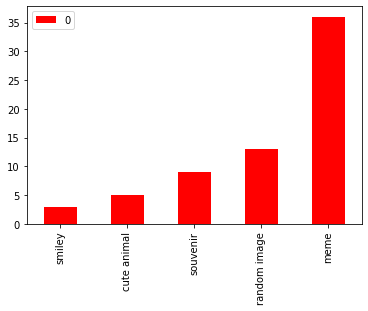

In [32]:
fridge_sorted_bar(color='red')

## Objective 2
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3
### Explanation of Results

200-400 Words

### Visualisation

## Objective 4 
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._